In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [6]:
image_size = (224, 224)
# image_size = (120, 120)
batch_size = 32

train_keras_ds = keras.utils.image_dataset_from_directory(
    # directory='/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/train',
    directory='/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train',
    labels="inferred",
    label_mode="int",
    # color_mode = "grayscale",
    shuffle = True,
    validation_split=None,
    image_size = image_size,
    batch_size = batch_size
)

train_keras_ds = train_keras_ds.ignore_errors()



Found 9246 files belonging to 2 classes.


In [7]:
 val_keras_ds = keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val',
    labels="inferred",
    label_mode="int",
    # color_mode = "grayscale",
    validation_split=None,
    shuffle = True,
    image_size = image_size,
    batch_size = batch_size
)

val_keras_ds = val_keras_ds.ignore_errors()

Found 829 files belonging to 2 classes.


In [8]:
test_keras_data = keras.utils.image_dataset_from_directory(
    # directory='/kaggle/input/bone-fracture-detection-using-xrays/archive (6)/val',
    directory='/kaggle/input/fracture-multi-region-x-ray-data/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test',
    labels="inferred",
    label_mode="int",
    # color_mode = "grayscale",
    validation_split=None,
    shuffle = True,
    image_size = image_size,
    batch_size = batch_size
)

test_keras_data = test_keras_data.ignore_errors()

Found 506 files belonging to 2 classes.


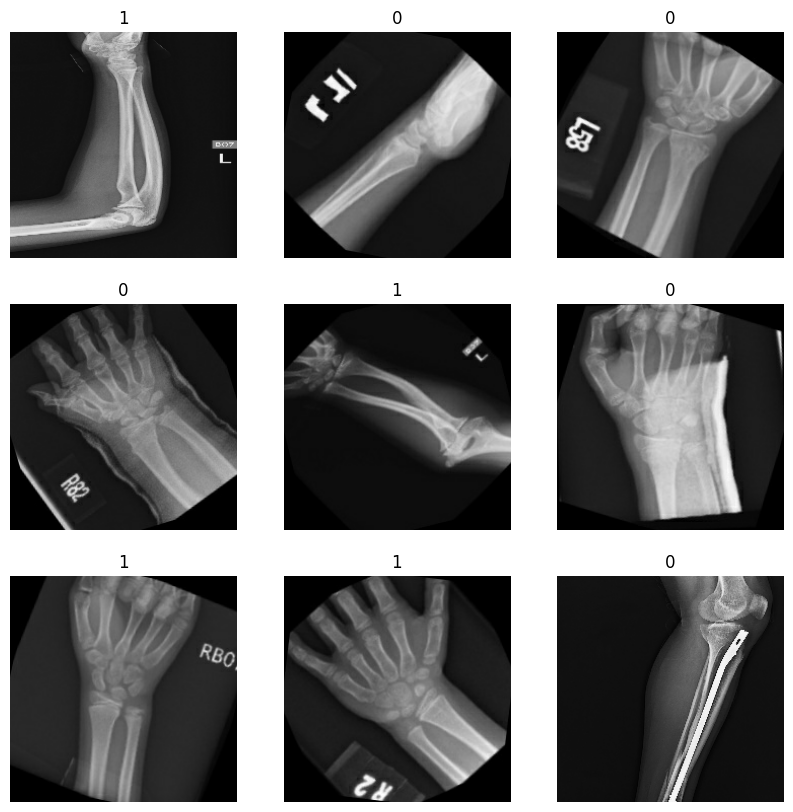

In [9]:
def visualize(data):
    plt.figure(figsize=(10, 10))
    for images, labels in data.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(np.array(images[i]).astype("uint8"))
            plt.title(int(labels[i]))
            plt.axis("off")

visualize(train_keras_ds)

In [10]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

In [11]:
# Apply `data_augmentation` to the training images.
train_keras_ds = train_keras_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_keras_ds = train_keras_ds.prefetch(tf_data.AUTOTUNE)
# val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

In [12]:
for count,(images,labels) in enumerate(train_keras_ds):
    if count<2:
        print(labels)
    else:
        break

tf.Tensor([0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0], shape=(32,), dtype=int32)
tf.Tensor([1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0], shape=(32,), dtype=int32)


In [13]:
# model = keras.Model(inputs=base_model.input, outputs=x)
# x = (base_model.output)
# # x = keras.layers.BatchNormalization()(x)  # Normalize activations
# x = keras.layers.BatchNormalization()(x)  # Normalize activations
# x = keras.layers.Dropout(0.5)(x)  # Drop 50% of neurons to reduce overfitting
# x = keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.L2(0.01))(x)  # L2 Regularization
# x = keras.layers.Dropout(0.5)(x)  # Another dropout layer
# # x = keras.layers.BatchNormalization()(x) # 
# # x = keras.layers.Dense(1, activation="sigmoid")(x) 
# x = keras.layers.Dense(1, activation="relu")(x) 

In [14]:
efficient_net_b0 = keras.applications.EfficientNetB0(
    include_top=True,
    weights=None,
    input_tensor=None,
    # input_shape=None,
    input_shape=(224, 224, 3),
    # input_shape=(120, 120, 1),
    # input_shape=(224, 224, 1),
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
    # classifier_activation="relu",
    name="efficientnetb0",
)

mobilenet_model = keras.applications.MobileNet(
    input_shape=(224, 224, 3),
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    weights=None,
    input_tensor=None,
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
    name="mobilenet",
)



In [15]:
resnet_model = keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    # input_shape=None,
    input_shape=(224, 224, 3),
    # input_shape=(120, 120, 1),
    # input_shape=(224, 224, 1),
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
    # classifier_activation="relu",
    name="resnet",
)

In [16]:
vgg_model = keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    # input_shape=None,
    input_shape=(224, 224, 3),
    # input_shape=(120, 120, 1),
    # input_shape=(224, 224, 1),
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
    # classifier_activation="relu",
    name="vgg",
)

densnet_model = keras.applications.DenseNet121(
    include_top=True,
    weights=None,
    input_tensor=None,
    # input_shape=None,
    input_shape=(224, 224, 3),
    # input_shape=(120, 120, 1),
    # input_shape=(224, 224, 1),
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
    # classifier_activation="relu",
    name="densnet",
)

In [17]:
def makePlots(history_dict):
    class_names = ['not_fractured','fractured']

    train_true_p = history_dict['true_positives'][-1]
    train_false_p = history_dict['false_positives'][-1]
    train_true_n = history_dict['true_negatives'][-1]
    train_false_n = history_dict['false_negatives'][-1]
    
    cm_train = np.array([[train_true_n,train_false_p],[train_false_n,train_true_p]], dtype=np.int32)

    val_true_p = history_dict['val_true_positives'][-1]
    val_false_p = history_dict['val_false_positives'][-1]
    val_true_n = history_dict['val_true_negatives'][-1]
    val_false_n = history_dict['val_false_negatives'][-1]
    
    cm_val = np.array([[val_true_n,val_false_p],[val_false_n,val_true_p]], dtype=np.int32)

    # fig, axs = plt.subplots(2, 3)
    epochs = range(1, len(history_dict['acc']) + 1)
    
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, history_dict['acc'], 'r', label='Training Accuracy')
    plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation Accuracy')
    plt.title('Training and validation accuracy')
    # plt.set_title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, history_dict['precision'], 'r', label='Training Precision')
    plt.plot(epochs, history_dict['val_precision'], 'b', label='Validation Precision')
    plt.title('Training and validation precision')
    # plt.set_title('Training and validation precision')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, history_dict['recall'], 'r', label='Training Recall')
    plt.plot(epochs, history_dict['val_recall'], 'b', label='Validation Recall')
    plt.title('Training and validation recall')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    
    plt.figure(figsize=(10,6))
    sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels Train")
    plt.ylabel("True Labels Train")
    plt.title("Confusion Matrix")
    
    plt.figure(figsize=(10,6))
    sns.heatmap(cm_val, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels Train")
    plt.ylabel("True Labels Train")
    plt.title("Confusion Matrix")
    
    
    plt.show()
    

In [18]:
def train_model(model,epoch_count=30):
    epochs = epoch_count

    callbacks = [
        keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
    ]
    model.compile(
        # optimizer=keras.optimizers.Adam(3e-4),
        optimizer=keras.optimizers.Adam(3e-4),
        loss=keras.losses.BinaryCrossentropy(),
        # loss=keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.BinaryAccuracy(name="acc"),
            keras.metrics.Precision(name='precision'),
            keras.metrics.Recall(name='recall'),
            keras.metrics.TruePositives(name='true_positives'),
            keras.metrics.TrueNegatives(name='true_negatives'),
            keras.metrics.FalsePositives(name='false_positives'),
            keras.metrics.FalseNegatives(name='false_negatives'),
        ],
    )
    history = model.fit(
        train_keras_ds,
        epochs=epochs,
        callbacks=callbacks,
        validation_data=val_keras_ds,
    )

    return history

In [19]:
# history_dict = history.history
# history_dict.keys()

In [20]:
def get_test_stats(model):
    test_loss, test_acc, test_precision, test_recall, test_true_pos, test_true_neg, test_false_pos, test_false_neg  = model.evaluate(test_keras_data)
    print(test_loss, test_acc, test_precision, test_recall, test_true_pos, test_true_neg, test_false_pos, test_false_neg)

Epoch 1/30
    283/Unknown 163s 313ms/step - acc: 0.5494 - false_negatives: 1010.6467 - false_positives: 1039.0177 - loss: 1.4766 - precision: 0.5571 - recall: 0.5505 - true_negatives: 1221.3851 - true_positives: 1272.9435

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


283/283 ━━━━━━━━━━━━━━━━━━━━ 179s 369ms/step - acc: 0.5494 - false_negatives: 1014.0493 - false_positives: 1042.7042 - loss: 1.4761 - precision: 0.5571 - recall: 0.5506 - true_negatives: 1225.5916 - true_positives: 1277.5282 - val_acc: 0.4200 - val_false_negatives: 388.0000 - val_false_positives: 0.0000e+00 - val_loss: 0.9678 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_true_negatives: 281.0000 - val_true_positives: 0.0000e+00
Epoch 2/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 46s 160ms/step - acc: 0.5925 - false_negatives: 837.3451 - false_positives: 992.2253 - loss: 1.0213 - precision: 0.5899 - recall: 0.6372 - true_negatives: 1282.9894 - true_positives: 1447.3134 - val_acc: 0.5321 - val_false_negatives: 254.0000 - val_false_positives: 59.0000 - val_loss: 5.9154 - val_precision: 0.6943 - val_recall: 0.3454 - val_true_negatives: 222.0000 - val_true_positives: 134.0000
Epoch 3/30
283/283 ━━━━━━━━━━━━━━━━━━━━ 44s 155ms/step - acc: 0.6727 - false_negatives: 729.9296 - false_positives:

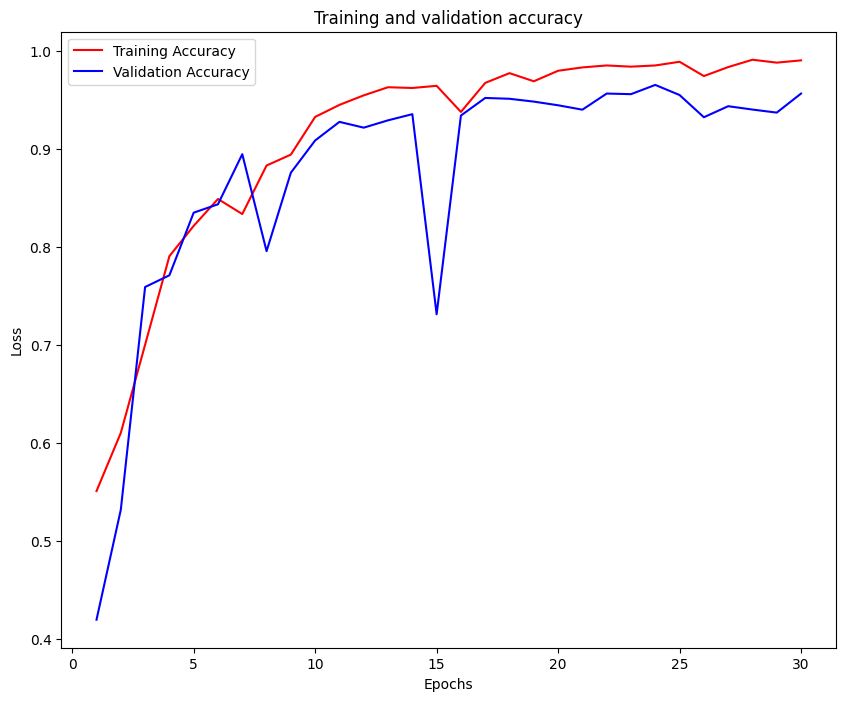

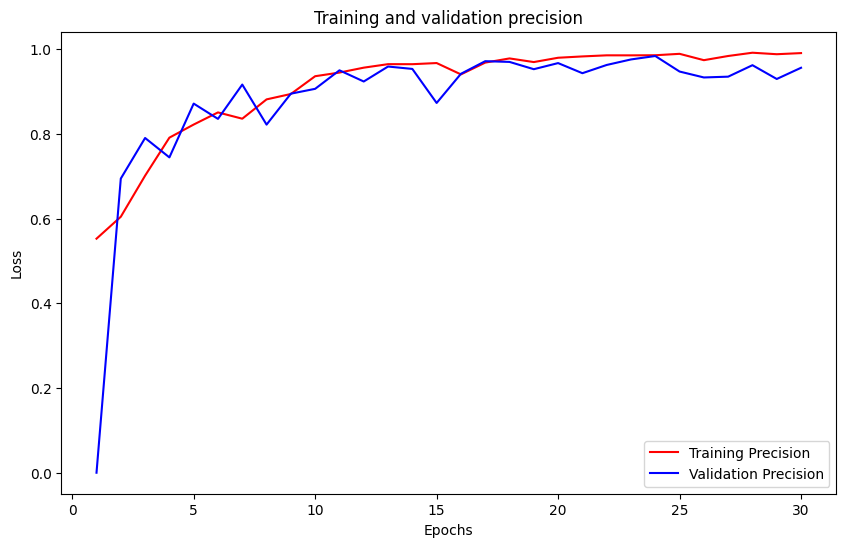

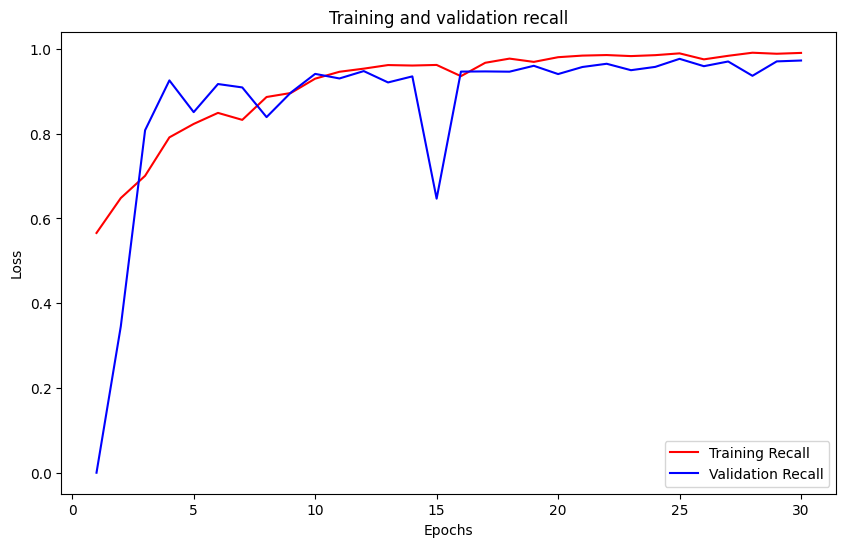

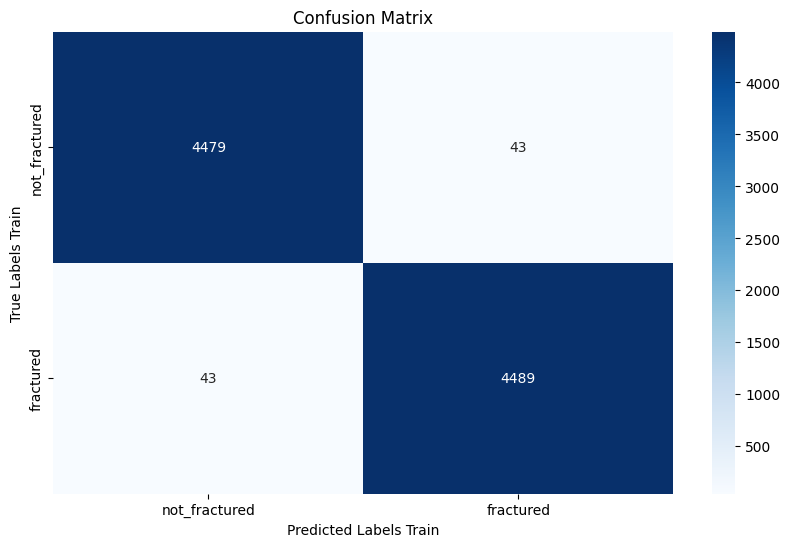

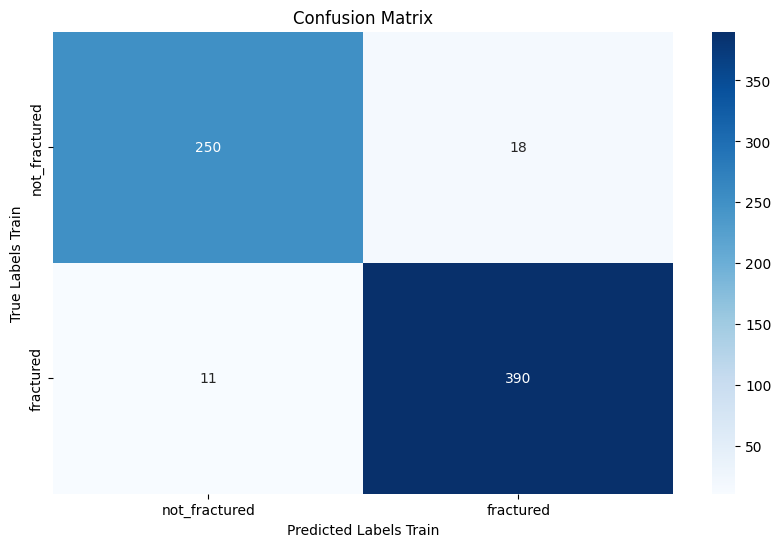

In [25]:
efficient_net_b0_history = train_model(efficient_net_b0,30)
makePlots(efficient_net_b0_history.history)

Epoch 1/5
283/283 ━━━━━━━━━━━━━━━━━━━━ 156s 381ms/step - acc: 0.6976 - false_negatives: 580.6901 - false_positives: 614.6725 - loss: 0.6021 - precision: 0.6951 - recall: 0.7085 - true_negatives: 1653.7711 - true_positives: 1710.7394 - val_acc: 0.7578 - val_false_negatives: 81.0000 - val_false_positives: 74.0000 - val_loss: 1.1764 - val_precision: 0.7967 - val_recall: 0.7817 - val_true_negatives: 195.0000 - val_true_positives: 290.0000
Epoch 2/5
283/283 ━━━━━━━━━━━━━━━━━━━━ 88s 309ms/step - acc: 0.9157 - false_negatives: 191.4014 - false_positives: 187.7606 - loss: 0.2255 - precision: 0.9176 - recall: 0.9138 - true_negatives: 2080.0527 - true_positives: 2100.6584 - val_acc: 0.5761 - val_false_negatives: 258.0000 - val_false_positives: 12.0000 - val_loss: 4.0462 - val_precision: 0.9118 - val_recall: 0.3246 - val_true_negatives: 243.0000 - val_true_positives: 124.0000
Epoch 3/5
283/283 ━━━━━━━━━━━━━━━━━━━━ 86s 304ms/step - acc: 0.9526 - false_negatives: 103.6549 - false_positives: 101.443

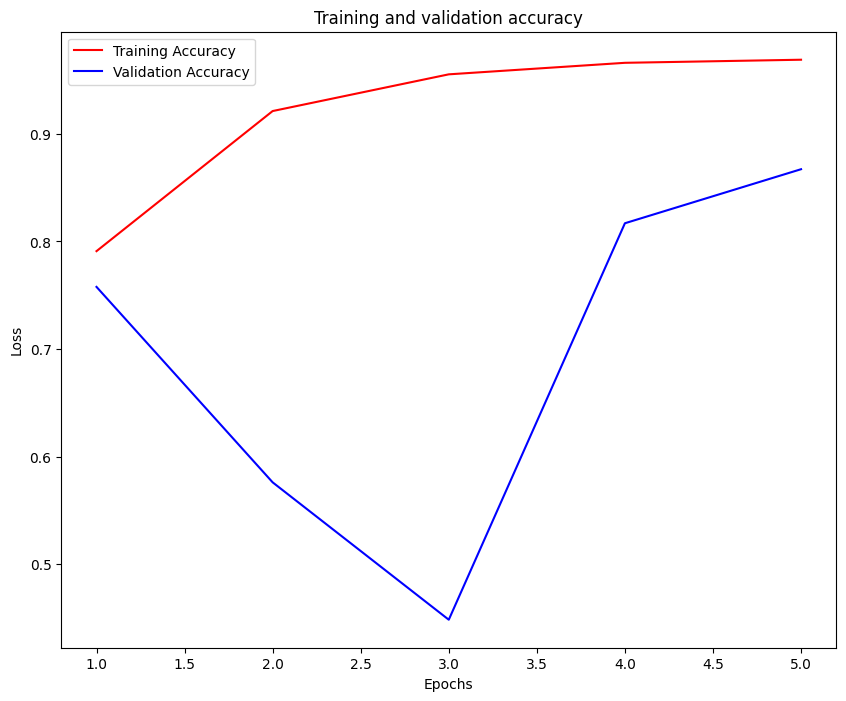

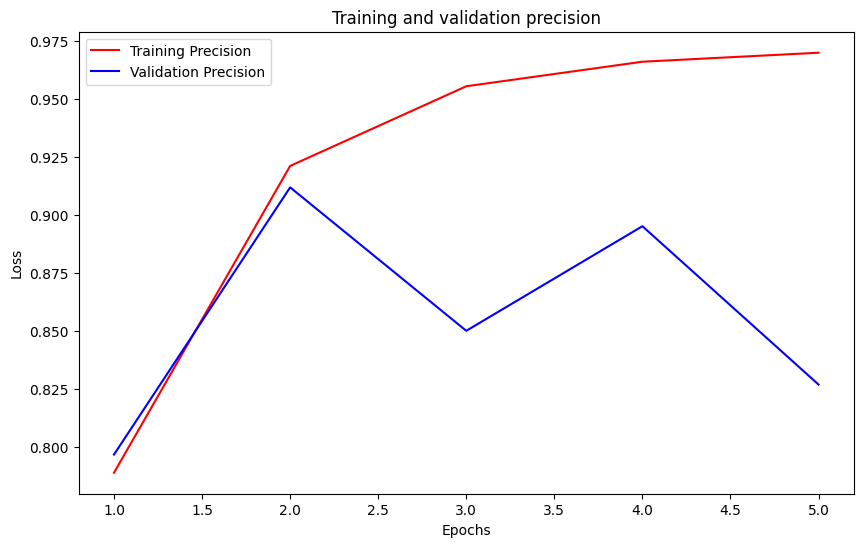

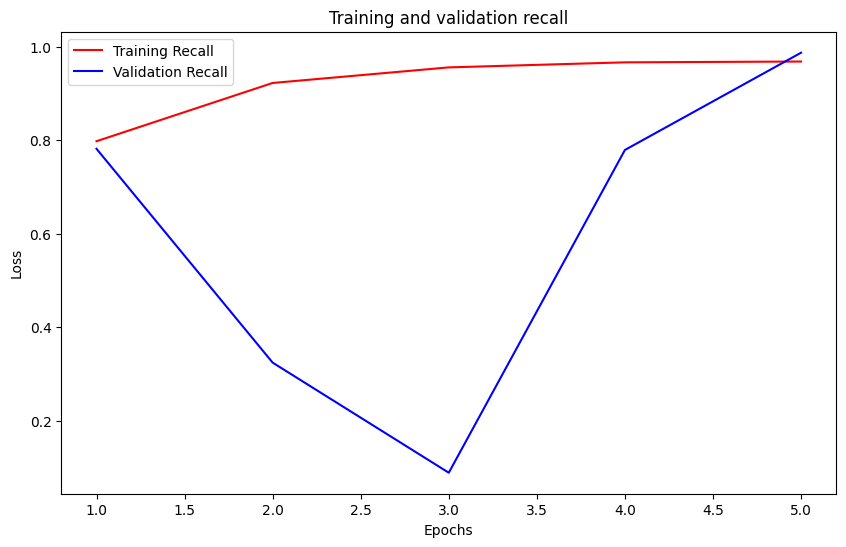

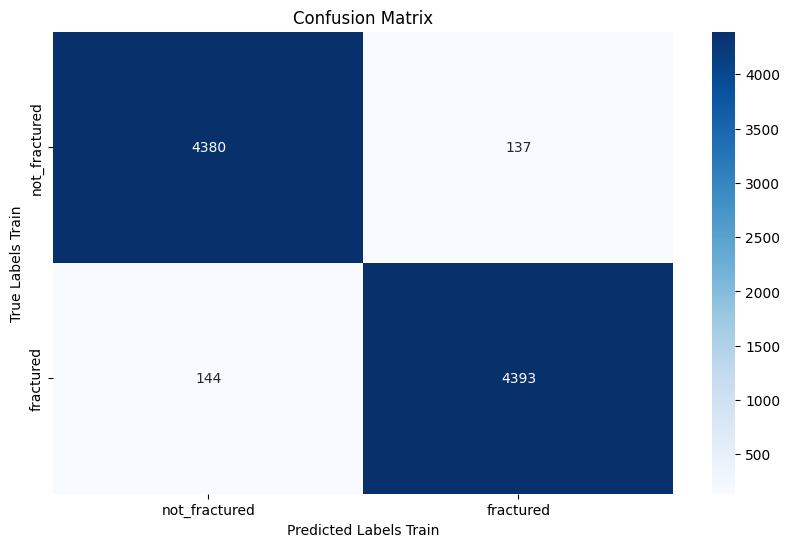

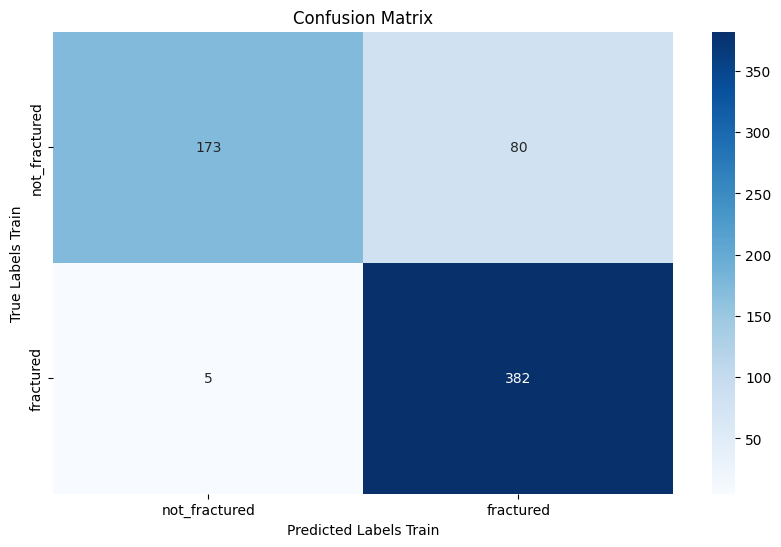

In [20]:
resnet_history = train_model(resnet_model,5)
makePlots(resnet_history.history)

Epoch 1/5
    283/Unknown 78s 168ms/step - acc: 0.6907 - false_negatives: 579.7491 - false_positives: 702.7986 - loss: 0.5824 - precision: 0.6805 - recall: 0.7234 - true_negatives: 1567.9681 - true_positives: 1693.4771

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


283/283 ━━━━━━━━━━━━━━━━━━━━ 86s 198ms/step - acc: 0.6909 - false_negatives: 581.3591 - false_positives: 704.4648 - loss: 0.5821 - precision: 0.6807 - recall: 0.7235 - true_negatives: 1574.1936 - true_positives: 1699.8556 - val_acc: 0.5949 - val_false_negatives: 0.0000e+00 - val_false_positives: 271.0000 - val_loss: 0.8775 - val_precision: 0.5949 - val_recall: 1.0000 - val_true_negatives: 0.0000e+00 - val_true_positives: 398.0000
Epoch 2/5
283/283 ━━━━━━━━━━━━━━━━━━━━ 32s 113ms/step - acc: 0.8620 - false_negatives: 304.2606 - false_positives: 301.6584 - loss: 0.3366 - precision: 0.8598 - recall: 0.8660 - true_negatives: 1979.6620 - true_positives: 1974.2922 - val_acc: 0.3527 - val_false_negatives: 384.0000 - val_false_positives: 51.0000 - val_loss: 1.0145 - val_precision: 0.1500 - val_recall: 0.0229 - val_true_negatives: 228.0000 - val_true_positives: 9.0000
Epoch 3/5
283/283 ━━━━━━━━━━━━━━━━━━━━ 32s 112ms/step - acc: 0.9153 - false_negatives: 189.5423 - false_positives: 189.3556 - los

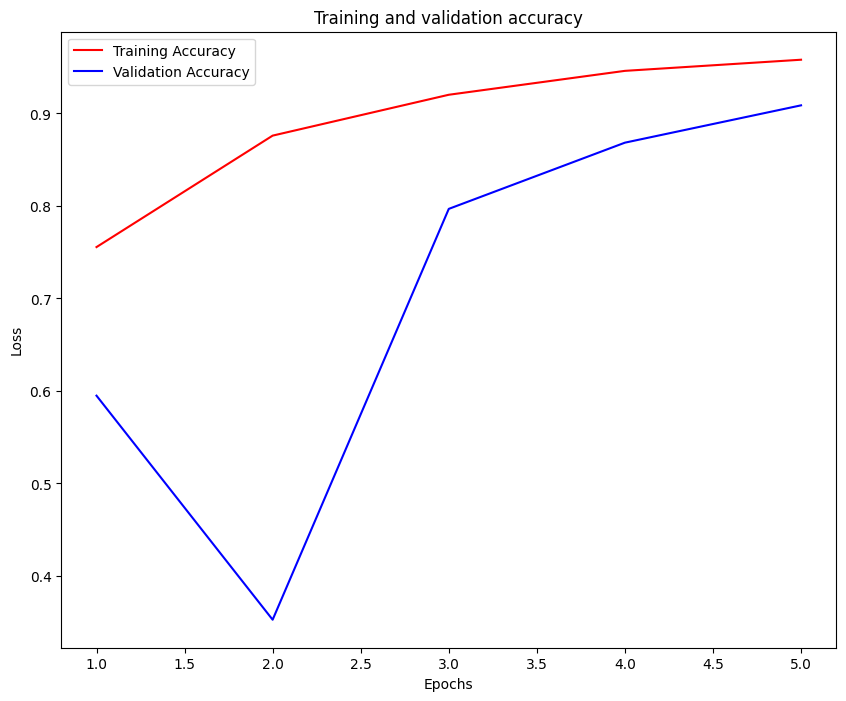

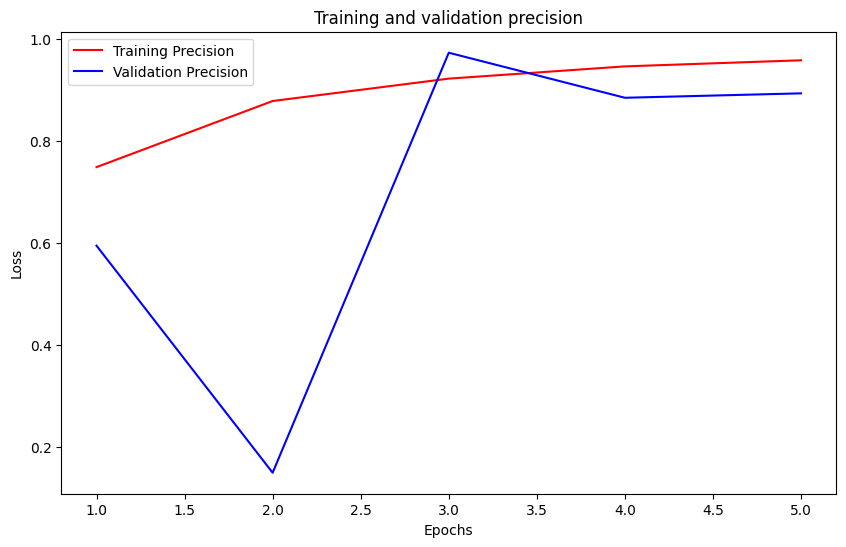

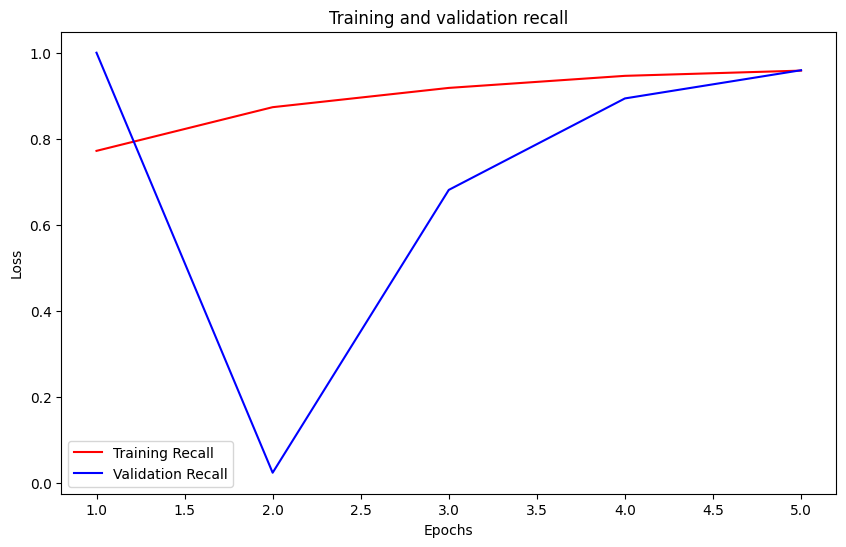

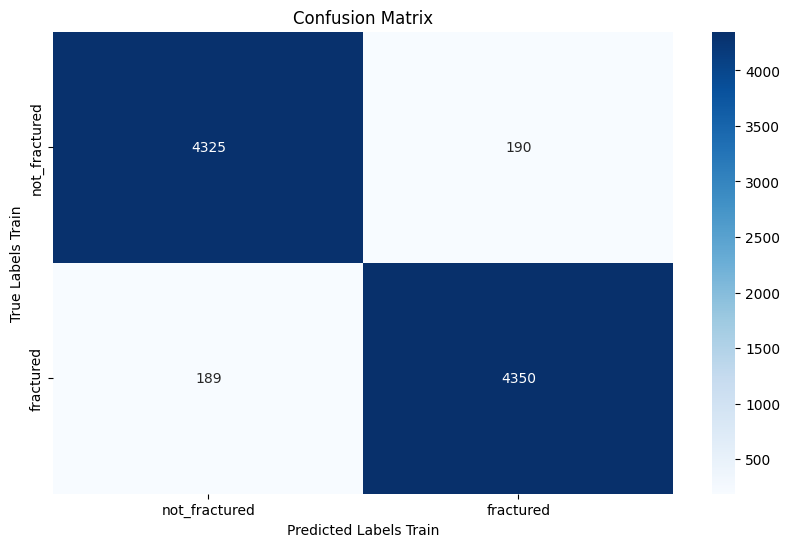

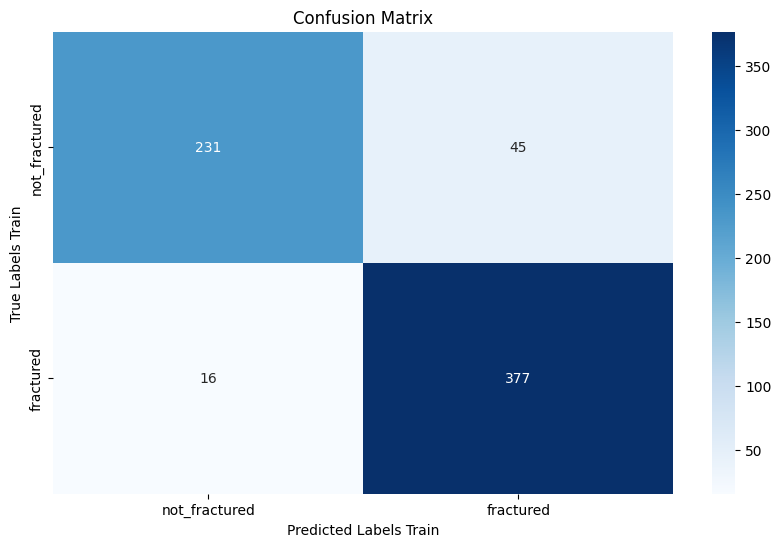

In [22]:
mobilenet_history = train_model(mobilenet_model,5)
makePlots(mobilenet_history.history)

In [ ]:
for i in range(1,20):
    os.remove(f'/kaggle/working/save_at_{i}.keras')

Epoch 1/5
    283/Unknown 240s 693ms/step - acc: 0.5799 - false_negatives: 768.4806 - false_positives: 1040.1591 - loss: 1.4526 - precision: 0.5770 - recall: 0.6353 - true_negatives: 1224.0071 - true_positives: 1511.3463

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


283/283 ━━━━━━━━━━━━━━━━━━━━ 282s 842ms/step - acc: 0.5801 - false_negatives: 770.6831 - false_positives: 1043.1725 - loss: 1.4502 - precision: 0.5772 - recall: 0.6355 - true_negatives: 1228.8978 - true_positives: 1517.1198 - val_acc: 0.7160 - val_false_negatives: 78.0000 - val_false_positives: 112.0000 - val_loss: 0.6111 - val_precision: 0.7389 - val_recall: 0.8025 - val_true_negatives: 162.0000 - val_true_positives: 317.0000
Epoch 2/5
283/283 ━━━━━━━━━━━━━━━━━━━━ 164s 577ms/step - acc: 0.7799 - false_negatives: 382.8451 - false_positives: 594.3134 - loss: 0.4860 - precision: 0.7562 - recall: 0.8297 - true_negatives: 1691.7640 - true_positives: 1890.9507 - val_acc: 0.8565 - val_false_negatives: 23.0000 - val_false_positives: 73.0000 - val_loss: 0.3519 - val_precision: 0.8333 - val_recall: 0.9407 - val_true_negatives: 208.0000 - val_true_positives: 365.0000
Epoch 3/5
283/283 ━━━━━━━━━━━━━━━━━━━━ 163s 575ms/step - acc: 0.8840 - false_negatives: 181.0634 - false_positives: 316.1338 - los

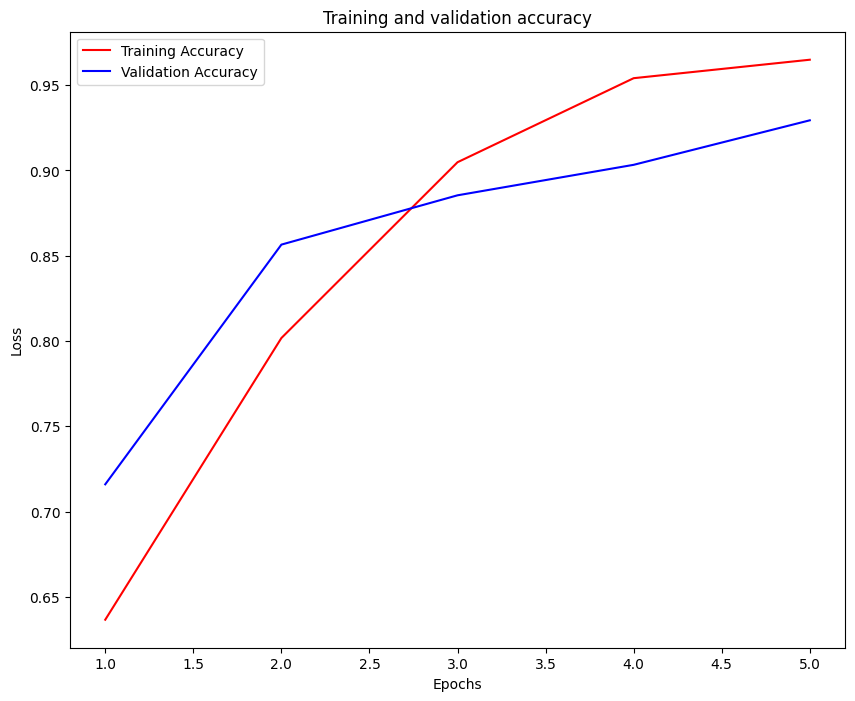

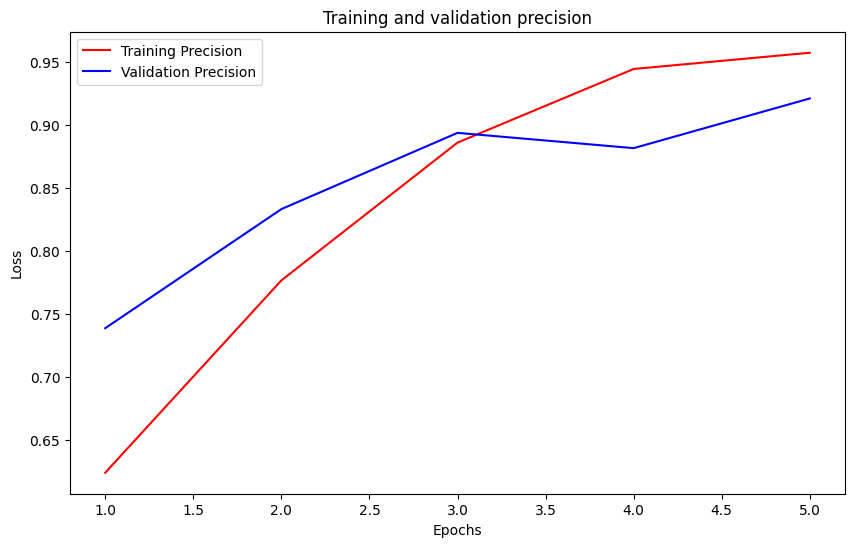

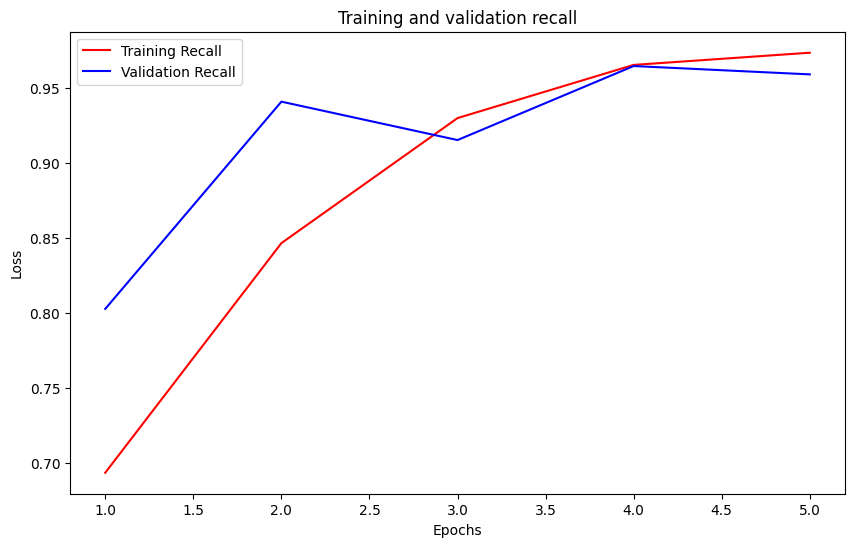

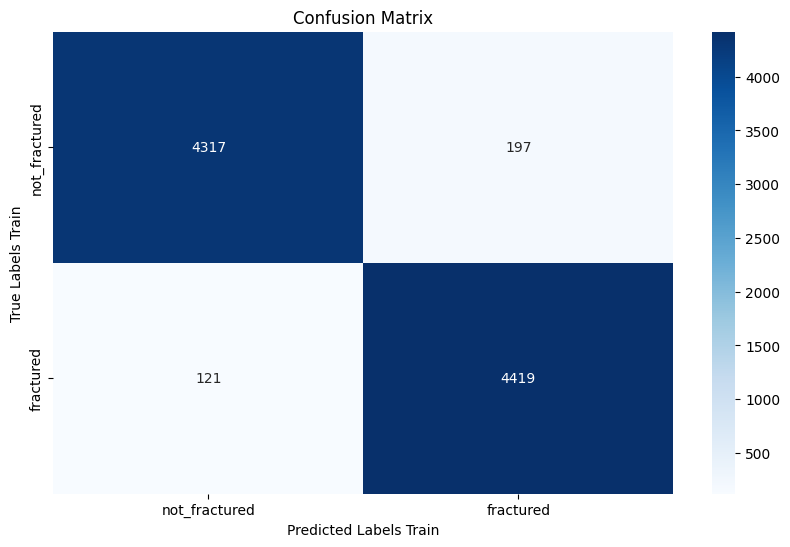

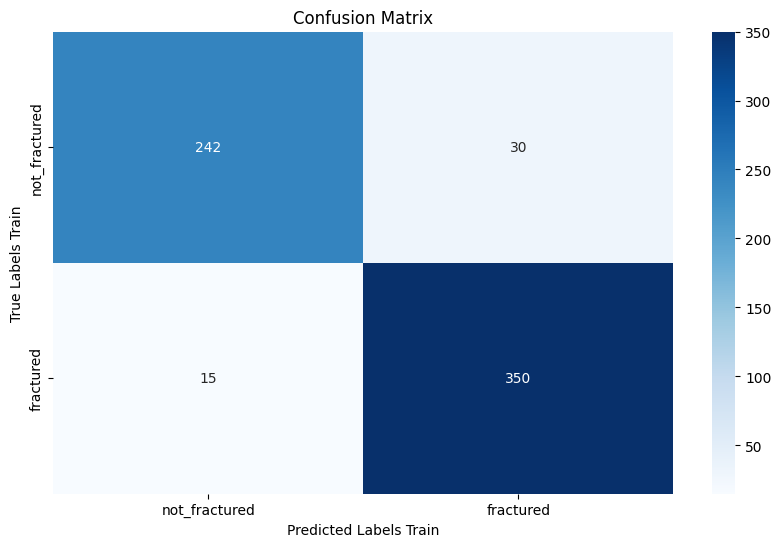

In [23]:
vgg_history = train_model(vgg_model,5)
makePlots(vgg_history.history)

Epoch 1/5
    284/Unknown 297s 655ms/step - acc: 0.8085 - false_negatives: 329.0739 - false_positives: 407.3697 - loss: 0.4181 - precision: 0.7974 - recall: 0.8384 - true_negatives: 1871.3064 - true_positives: 1952.2429

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


284/284 ━━━━━━━━━━━━━━━━━━━━ 320s 734ms/step - acc: 0.8087 - false_negatives: 329.8035 - false_positives: 408.1614 - loss: 0.4177 - precision: 0.7976 - recall: 0.8386 - true_negatives: 1878.4281 - true_positives: 1959.4807 - val_acc: 0.4961 - val_false_negatives: 282.0000 - val_false_positives: 39.0000 - val_loss: 2.4585 - val_precision: 0.7068 - val_recall: 0.2500 - val_true_negatives: 222.0000 - val_true_positives: 94.0000
Epoch 2/5
284/284 ━━━━━━━━━━━━━━━━━━━━ 96s 337ms/step - acc: 0.9415 - false_negatives: 114.2042 - false_positives: 132.0986 - loss: 0.1558 - precision: 0.9394 - recall: 0.9463 - true_negatives: 2138.3628 - true_positives: 2175.2078 - val_acc: 0.7692 - val_false_negatives: 140.0000 - val_false_positives: 7.0000 - val_loss: 0.7731 - val_precision: 0.9708 - val_recall: 0.6247 - val_true_negatives: 257.0000 - val_true_positives: 233.0000
Epoch 3/5
284/284 ━━━━━━━━━━━━━━━━━━━━ 96s 337ms/step - acc: 0.9660 - false_negatives: 66.3063 - false_positives: 83.3838 - loss: 0.1

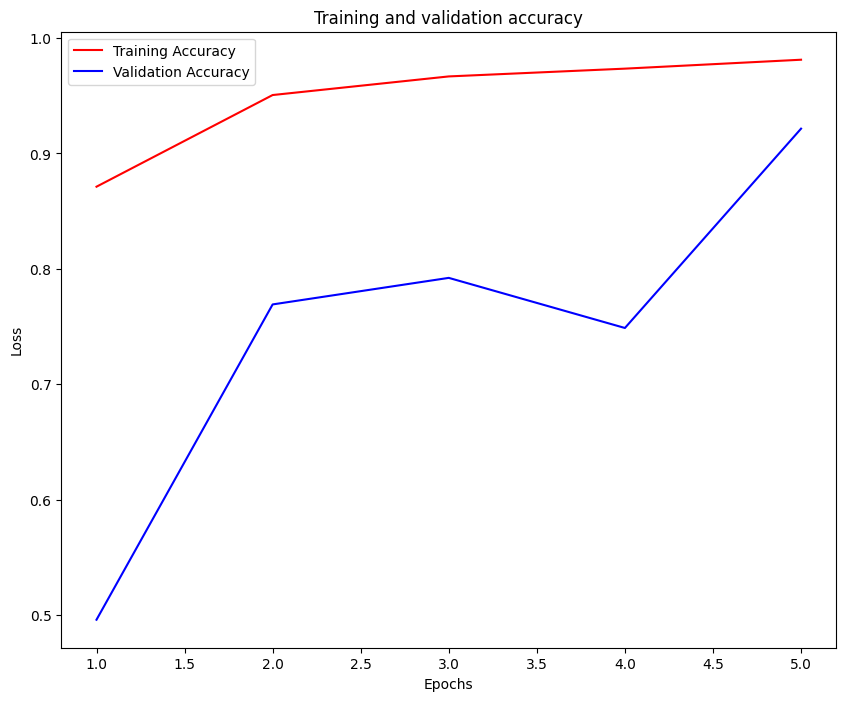

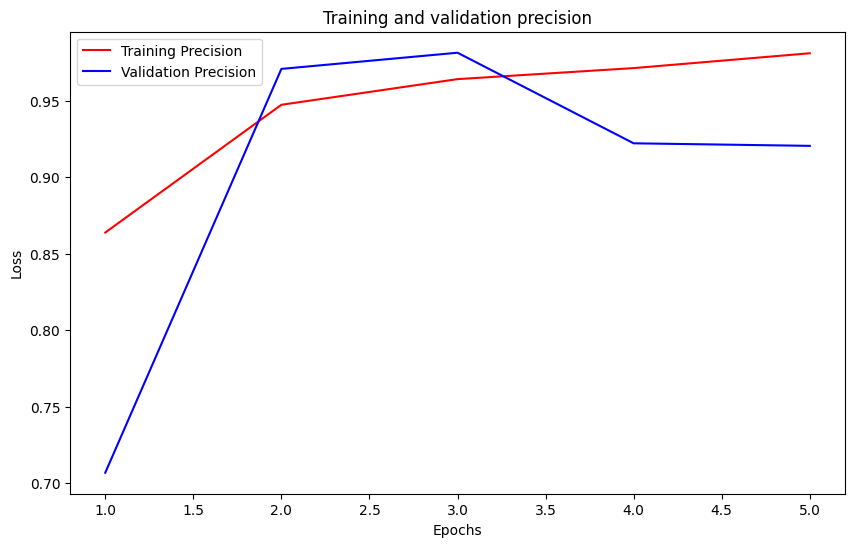

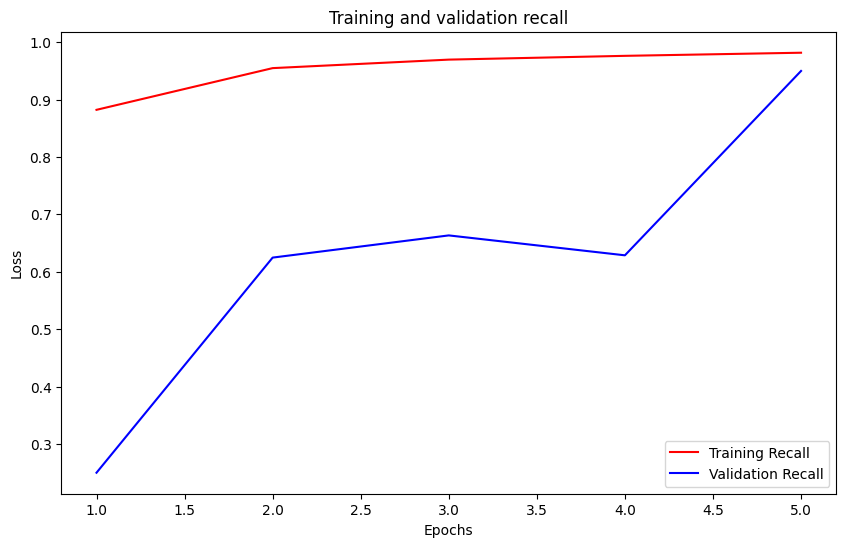

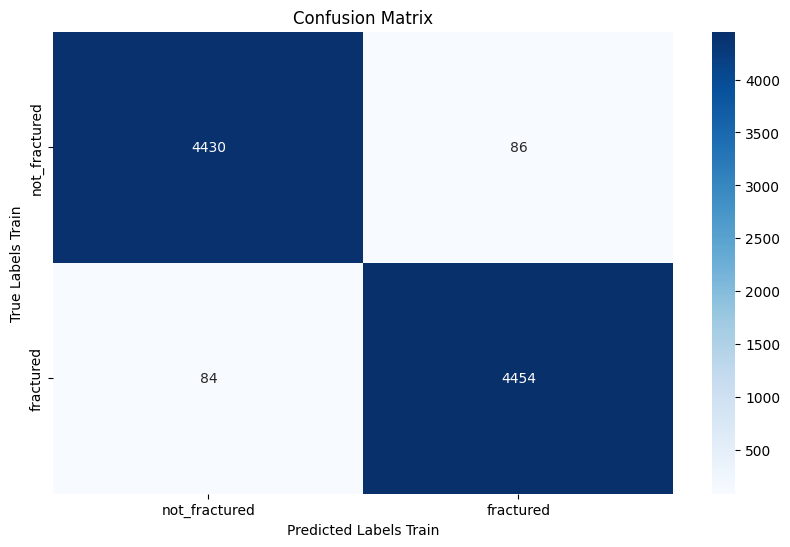

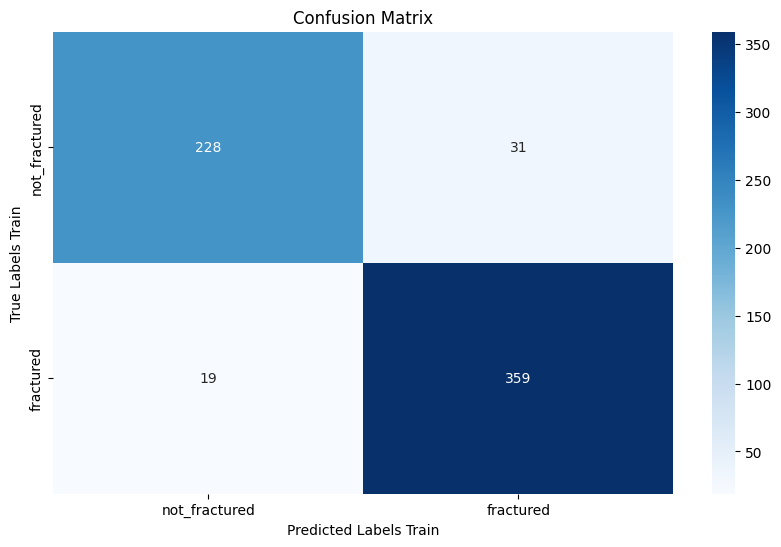

In [24]:
desnet_history = train_model(densnet_model,5)
makePlots(desnet_history.history)

In [ ]:
# import torch
# from torch.utils.data import DataLoader

In [ ]:
# train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
# test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


In [ ]:
# model.save_weights('/kaggle/working/highest_accuracy_weights.weights.h5',overwrite=True)